1. Data exploration and visualization

Explore dataset

Choose important features and visualize them according to survival/non-survival


2. Data cleaning, Feature selection and Feature engineering

Null values

Encode categorical data

Transform features

3. Test different classifiers

Logistic Regression (LR)

K-NN

Support Vector Machines (SVM)

Naive Bayes

Random Forest (RF)

Appliances energy prediction Data Set
The data set is at 10 min for about 4.5 months. 
The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network.
Each wireless node transmitted the temperature and humidity conditions around 3.3 min. 
Then, the wireless data was averaged for 10 minutes periods. 
The energy data was logged every 10 minutes with m-bus energy meters. 
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

In [86]:
#pip install -U scikit-learn

In [87]:
import pandas as pd
import numpy as np
#import scikit-learn as sklearn
from sklearn.linear_model import LinearRegression

In [88]:
raw_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [89]:
raw_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [90]:
raw_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [91]:
#Null values`
raw_df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [92]:
raw_df.isnull().values.any()

False

In [93]:
raw_df.isnull().sum().sum()

0

In [94]:
X=raw_df[['Appliances']]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


In [95]:
#pip install cookiecutter

In [96]:

#Create a list for feature and target column
All_ColumnNames = raw_df.columns
Target_ColumnNames = ['Appliances']
Feature_ColumnNames = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']
Misc_ColumnNames = ['date']

In [97]:
print(All_ColumnNames)
print(Target_ColumnNames)
print(Feature_ColumnNames)
print(Misc_ColumnNames)

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')
['Appliances']
['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
['date']


In [98]:
#EDA Steps 1. INfo of DataSet  2. Find % of Missing Values in. each column  3.Find  distribution of each variable  
#4.Find Correlation btw variables 5.Relation btw target and feature variable

In [99]:
#feature Data set
feature_df = raw_df[Feature_ColumnNames]
feature_df.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [100]:
#split raw_df data btw training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_df, raw_df[Target_ColumnNames], test_size = 0.20, random_state = 0 )

               lights        T1      RH_1        T2      RH_2        T3  \
lights       1.000000 -0.025418  0.106928 -0.005706  0.048671 -0.100363   
T1          -0.025418  1.000000  0.161396  0.837182 -0.005109  0.892122   
RH_1         0.106928  0.161396  1.000000  0.268004  0.797869  0.249255   
T2          -0.005706  0.837182  0.268004  1.000000 -0.166889  0.734688   
RH_2         0.048671 -0.005109  0.797869 -0.166889  1.000000  0.134479   
T3          -0.100363  0.892122  0.249255  0.734688  0.134479  1.000000   
RH_3         0.134011 -0.029515  0.843892  0.121161  0.676757 -0.014382   
T4          -0.012628  0.877076  0.104723  0.761943 -0.048727  0.853568   
RH_4         0.117123  0.095052  0.879152  0.229923  0.720560  0.117620   
T5          -0.079426  0.884602  0.206490  0.720374  0.111360  0.888015   
RH_5         0.143945 -0.017124  0.301704  0.027573  0.249186 -0.072113   
T6          -0.082035  0.653552  0.316003  0.800119 -0.008260  0.686284   
RH_6         0.157826 -0.

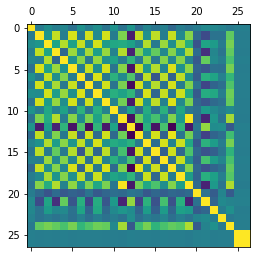

[[ 2.70224073  2.42077925 -0.9520699 ]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
low_variance_features []


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
#Feature Engineering
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, RFE, VarianceThreshold
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_csv('data.csv')

# Split the data into features and target
#X = df.drop('target', axis=1)
#y = df['target']

# Remove highly correlated variables
# Set the threshold for correlation coefficient
threshold = 0.7

# Calculate the correlation matrix

corr = x_train.corr()
print(corr)
# Find the pairs of features with correlation coefficient greater than the threshold
correlated_features = np.where(np.abs(corr) > threshold)[0]
print("correlated_features",correlated_features)
# Remove the correlated features
#x_train = x_train.drop(correlated_features)
plt.matshow(x_train.corr())
plt.show()
# Stepwise regression
# Set the number of features to select
#k = 5
# Create a logistic regression model
model = LinearRegression()

# Perform stepwise regression

#rfe = RFE(model, k)
#rfe.fit(x_train, y_train)


from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2, f_regression

selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(x_train, y_train)

# Fit a linear regression model on the selected features
model = LinearRegression()
model.fit(X_new, y_train)

# Print the coefficients of the model
print(model.coef_)
print(model.get_params())


# Get the selected features
#selected_features = rfe.support_selected_features
#X = X.iloc[:, selected_features]
#print("selected_features", selected_features)

# Remove near zero variance variables
# Set the threshold for variance
threshold = 0.01

# Calculate the variance of each feature
var = x_train.var()

# Find the features with variance less than the threshold
low_variance_features = np.where(var < threshold)[0]
print("low_variance_features", low_variance_features)
# Remove the low-variance features
x_train = x_train.drop(low_variance_features, axis=1)

# Print the selected features
#print(x_train.columns)

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_transformer = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median'))
    ])

char_transformer = Pipeline([
    ('char_imputer', SimpleImputer(strategy='most_frequent')),
    ('OHE',OneHotEncoder(handle_unknown='error',drop='first', sparse =False)),
    ])

scale_transformer = Pipeline([
    ('scaler', StandardScaler())
    ])
#OHE_transformer = OneHotEncoder(handle_unknown='error',drop='first', sparse =False)


#from sklearn.preprocessing import OneHotEncoder
#OH_encoder = OneHotEncoder(handle_unknown='error',drop='first', sparse=False)
#OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train[final_char_feat_names]))
#OH_col_names = OH_encoder.get_feature_names(final_char_feat_names)
#OH_col_names

preprocessor = ColumnTransformer(
    transformers=[
         ("num", num_transformer, Feature_ColumnNames),
        ("scaler",scale_transformer,Feature_ColumnNames)
    ]
)

In [104]:
prepfit = preprocessor.fit(x_train)
#df_preprocessed = pd.DataFrame(prepfit.transform(df_train))
#new_col_names = [*char2num_feat_names,*final_num_feat_names,*list(OH_col_names)]
data = prepfit.transform(x_train)
#print(final_char_feat_names)
#print(OH_col_names)
#print(data.shape)
#print(len(new_col_names))
#mydf = pd.DataFrame(data)
#mydf.columns = new_col_names

#print(df_train[char2num_feat_names])
#mydf.info()



In [ ]:
#print(data)
print(pd.DataFrame(data))

In [105]:
x_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9830,0,22.100000,35.900000,19.600000,38.090000,21.890000,35.500000,20.790000,34.790000,18.600000,...,19.323333,37.126667,5.233333,762.500000,83.333333,3.000000,24.666667,2.600000,44.946784,44.946784
8112,20,20.600000,38.230000,18.100000,40.790000,21.000000,37.000000,20.600000,36.500000,18.290000,...,17.426667,36.963333,0.100000,754.000000,98.000000,1.000000,50.000000,-0.200000,38.843556,38.843556
8423,0,19.890000,36.900000,16.890000,40.626667,20.290000,37.326667,20.133333,35.590000,17.760000,...,17.390000,39.433333,0.633333,753.933333,87.000000,1.166667,65.000000,-1.366667,3.768233,3.768233
13059,0,21.890000,38.966667,22.696667,37.766667,22.963333,37.590000,21.823333,38.126667,20.452857,...,21.960000,37.133333,13.600000,749.850000,56.000000,6.000000,28.000000,4.900000,45.148091,45.148091
2639,0,19.856667,43.760000,19.260000,43.290000,20.000000,44.590000,16.600000,46.290000,16.720000,...,16.290000,48.067500,9.100000,759.700000,82.000000,9.833333,40.000000,6.116667,41.627775,41.627775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,30,22.790000,44.700000,21.600000,43.500000,23.100000,40.790000,22.390000,43.066667,21.200000,...,20.926667,41.730000,13.716667,750.466667,80.500000,0.666667,40.000000,10.416667,33.159902,33.159902
19648,0,24.033333,44.860000,22.390000,45.290000,26.700000,40.245000,24.500000,42.200000,22.390000,...,22.700000,46.000000,13.733333,755.600000,85.333333,3.000000,55.666667,11.266667,24.197280,24.197280
9845,0,21.666667,36.090000,19.000000,38.863333,22.033333,35.933333,20.463333,34.863333,18.500000,...,19.390000,39.090000,5.283333,762.300000,80.333333,3.000000,23.000000,2.150000,29.956511,29.956511
10799,0,21.890000,41.900000,20.790000,42.500000,23.200000,38.290000,20.290000,42.400000,19.890000,...,20.000000,42.230000,13.550000,752.050000,71.500000,6.333333,40.000000,8.366667,38.867774,38.867774


In [106]:
data_test = prepfit.transform(x_test)
data_test

array([[ 0.00000000e+00,  2.12000000e+01,  3.32900000e+01, ...,
        -1.53513536e+00,  1.17196202e+00,  1.17196202e+00],
       [ 0.00000000e+00,  2.17900000e+01,  3.85000000e+01, ...,
        -2.30897400e-01, -2.74398529e-02, -2.74398529e-02],
       [ 0.00000000e+00,  2.23900000e+01,  4.13900000e+01, ...,
         1.62759789e-01, -1.46822270e+00, -1.46822270e+00],
       ...,
       [ 0.00000000e+00,  1.86666667e+01,  3.80600000e+01, ...,
        -4.69477514e-01, -5.94468945e-01, -5.94468945e-01],
       [ 0.00000000e+00,  2.13900000e+01,  3.79000000e+01, ...,
         1.38901778e-01,  2.80823305e-01,  2.80823305e-01],
       [ 0.00000000e+00,  2.21000000e+01,  3.64000000e+01, ...,
        -3.34282116e-01,  1.02449761e+00,  1.02449761e+00]])

MSE: 9683.91343783493


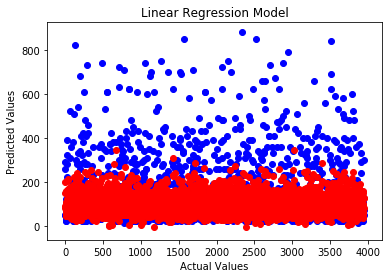

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# Create a logistic regression model
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = linreg.predict(x_test)

# Evaluate the model's performance on the test data
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()



MSE: 8555.095266922925


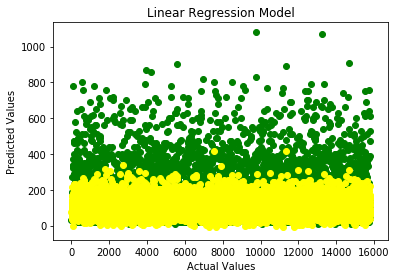

In [108]:

# Predict the labels of the test data
y_pred_train = linreg.predict(x_train)

# Evaluate the model's performance on the test data
mse = mean_squared_error(y_train, y_pred_train)
print('MSE:', mse)

plt.scatter(range(len(y_train)), y_train, color='green')
plt.scatter(range(len(y_pred_train)), y_pred_train, color='yellow')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

In [109]:
y_train

,Appliances
9830,30
8112,50
8423,40
13059,50
2639,50
...,...
13123,120
19648,50
9845,70
10799,100


In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a pipeline for numeric imputation
numeric_imputer = SimpleImputer(strategy='mean')

# Create a pipeline for categorical imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Create a pipeline for one hot encoding
one_hot_encoder = OneHotEncoder()

In [111]:
# Create a column transformer to apply the imputation and one hot encoding pipelines
column_transformer = ColumnTransformer([
    ('numeric_imputer', numeric_imputer, ['numeric_features']),
    ('categorical_imputer', categorical_imputer, ['categorical_features']),
    ('one_hot_encoder', one_hot_encoder, ['categorical_features'])
])

In [112]:
# Create a standard scaler
scaler = StandardScaler()

In [113]:
# Create a pipeline to apply the column transformer and standard scaler
preprocessing_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('scaler', scaler)
])

#feature Engineering

In [114]:
#Run Decision TREE

MSE: 9651.00076007094


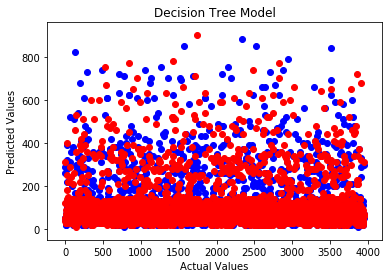

Accuracy: 0.26197111730428174


In [115]:

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Create a Decision tree model
tree_clf = DecisionTreeClassifier()

# Fit the model to the training data
tree_clf.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = tree_clf.predict(x_test)

# Evaluate the model's performance on the test data
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Model')
plt.show()
# Evaluate the performance of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))





In [129]:
#Run Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Create a Decision tree model
tree_rf = RandomForestClassifier()

# Fit the model to the training data
tree_rf.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = tree_rf.predict(x_test)
val_test = y_test.ravel()
valu_pred = y_pred.ravel()
plt.scatter(range(len(val_test)), y_test, color='blue')
plt.scatter(range(len(valu_pred)), y_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random forest Model')
plt.show()

# Evaluate the performance of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


AttributeError: 'DataFrame' object has no attribute 'ravel'

In [ ]:
#Compare all 3 models